### Import Libraries ###

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### Set Paths ###


In [10]:
data_dir = r"C:\\Users\\BAJWA LAPTOPS\\Desktop\\music_genre classification_ system\\images_original"

img_height, img_width = 128, 128
batch_size = 32
epochs = 20

### Data Augmentation & Preprocessing ###

In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


### CNN Model ###

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_gen.num_classes, activation='softmax')  # 10 genres
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

C:\Users\BAJWA LAPTOPS\anaconda3\envs\torch_gpu\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Callbacks ###

In [13]:
checkpoint = ModelCheckpoint('model/CNN_model.h5', save_best_only=True, monitor='val_accuracy')
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

### Train Model ###

In [14]:
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen,
    callbacks=[checkpoint, early_stop]
)

C:\Users\BAJWA LAPTOPS\anaconda3\envs\torch_gpu\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.1214 - loss: 2.3824

25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 455ms/step - accuracy: 0.1218 - loss: 2.3796 - val_accuracy: 0.2211 - val_loss: 2.1476
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.2513 - loss: 2.0358

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.2522 - loss: 2.0340 - val_accuracy: 0.2965 - val_loss: 1.8259
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.3337 - loss: 1.8151

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - accuracy: 0.3355 - loss: 1.8104 - val_accuracy: 0.4271 - val_loss: 1.7518
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.4542 - loss: 1.4874 - val_accuracy: 0.4271 - val_loss: 1.5949
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.5354 - loss: 1.3362 - val_accuracy: 0.3970 - val_loss: 1.7193
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.5648 - loss: 1.2391

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.5654 - loss: 1.2371 - val_accuracy: 0.4523 - val_loss: 1.6316
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.6344 - loss: 0.9943

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.6348 - loss: 0.9938 - val_accuracy: 0.4975 - val_loss: 1.5620
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 266ms/step - accuracy: 0.6900 - loss: 0.8359 - val_accuracy: 0.4774 - val_loss: 1.5620
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.7617 - loss: 0.6712

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.7627 - loss: 0.6699 - val_accuracy: 0.5176 - val_loss: 1.6598
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step - accuracy: 0.8430 - loss: 0.4993 - val_accuracy: 0.5075 - val_loss: 1.7733
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - accuracy: 0.8751 - loss: 0.4215 - val_accuracy: 0.5025 - val_loss: 1.7030
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.8951 - loss: 0.3570 - val_accuracy: 0.5075 - val_loss: 1.6631


### Optional: Plot Training History ###

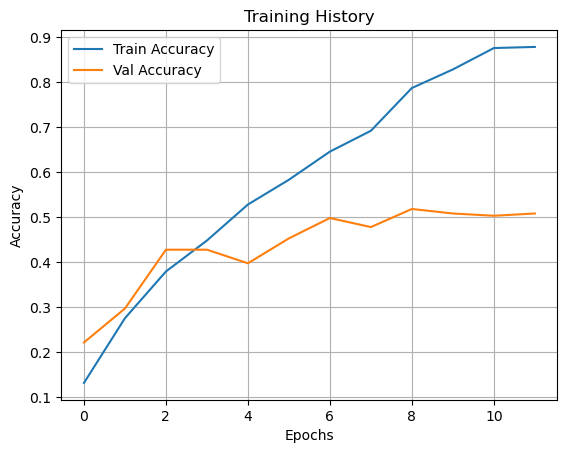

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training History')
plt.show()


###  Load the Trained Model & Label Encoder ###

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import joblib
import os

# Load the trained model
model = load_model(r"CNN_model.h5")

# Load the label encoder
le = joblib.load('label_encoder.pkl')


###  Function to Predict Genre from Image ###

In [18]:
def predict_genre(img_path, model, le, target_size=(128, 128)):
    try:
        # Load and preprocess image
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalize

        # Make prediction
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        genre_name = le.inverse_transform([predicted_class])[0]

        print(f"Predicted Label: {predicted_class}")
        print(f"Predicted Genre: {genre_name}")

        return genre_name

    except Exception as e:
        print("Error:", e)
        return None


### Run the Prediction on an Image ###

In [21]:
image_path = r"C:\Users\BAJWA LAPTOPS/Desktop/music_genre classification_ system/images_original/classical/classical00013.png"
predict_genre(image_path, model, le)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Label: 1
Predicted Genre: classical


'classical'